<a href="https://colab.research.google.com/github/AlHasSaN0ALi/Project-Phase-3---DSAI-305/blob/main/PHASE_3_(325)_Habib_Ahmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

Missing values after dropping columns:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Accuracy: 95.00%

Classification Report:
       

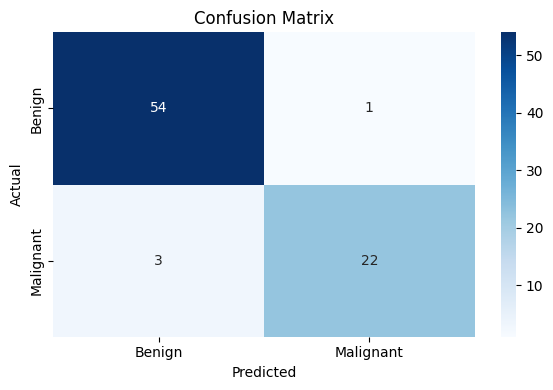

In [47]:

# Load the dataset
df = pd.read_csv("/content/data (1).csv")


df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])


print("Missing values after dropping columns:\n", df.isnull().sum())

df.fillna(df.median(), inplace=True)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]



X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = MLPClassifier(hidden_layer_sizes=(15,), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

print(f"Accuracy: {acc * 100:.2f}%\n")
print("Classification Report:")
print(cr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

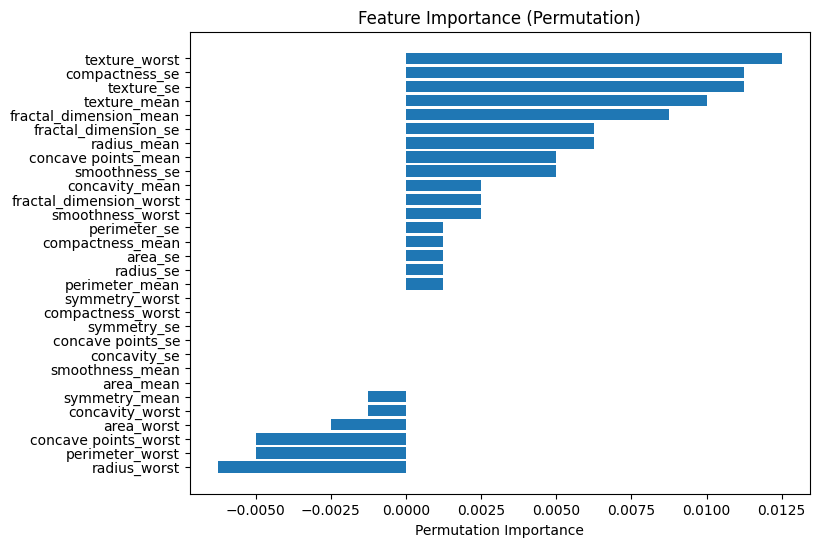

In [48]:
# Permutation Feature Importance
perm_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = perm_result.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(X.columns[perm_sorted_idx], perm_result.importances_mean[perm_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Permutation)")
plt.show()


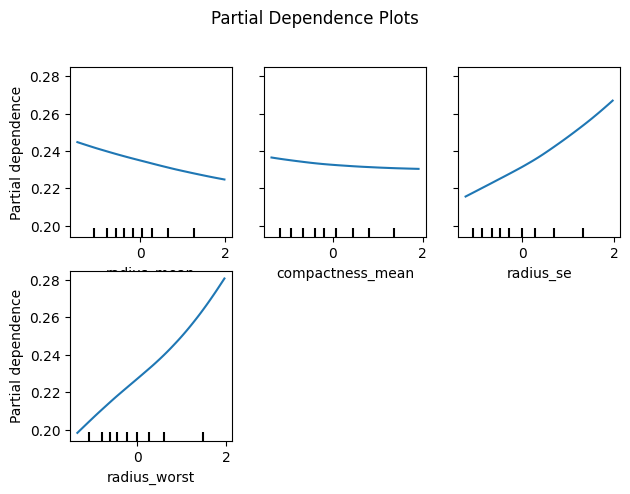

In [49]:
# Partial Dependence Plots
features = [0, 5, 10, 20]
PartialDependenceDisplay.from_estimator(model, X_train, features=features, feature_names=X.columns,  random_state=42)
plt.suptitle("Partial Dependence Plots", y=1.02)
plt.tight_layout()
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

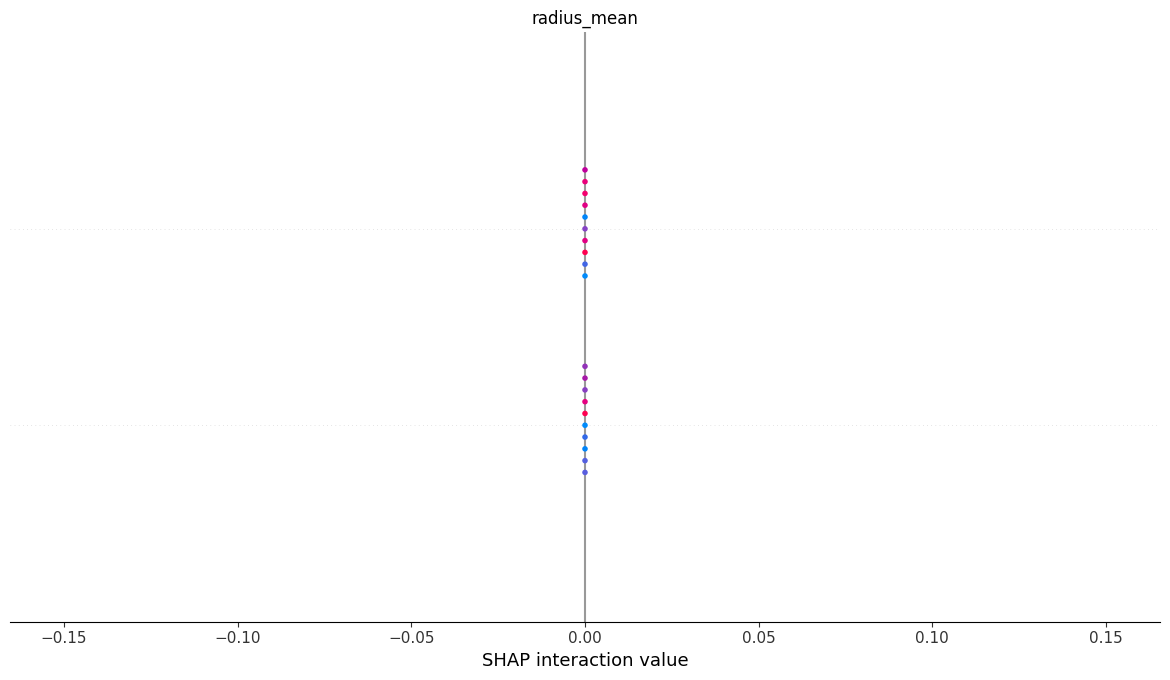

DimensionError: Length of features is not equal to the length of shap_values!

In [50]:

shap.initjs()
explainer_shap = shap.KernelExplainer(model.predict_proba, shap.sample(X_train, 100))
shap_values = explainer_shap.shap_values(X_test[:10])


shap.summary_plot(shap_values, X_test[:10], feature_names=X.columns)


shap.force_plot(explainer_shap.expected_value[1], shap_values[1][0], feature_names=X.columns)

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns.tolist(),
    class_names=['Benign', 'Malignant'],
    mode='classification'
)


lime_exp = lime_explainer.explain_instance(
    data_row=X_test[0],
    predict_fn=model.predict_proba
)

lime_exp.show_in_notebook(show_table=True)

Accuracy: 97.37%

Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98        71
   Malignant       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



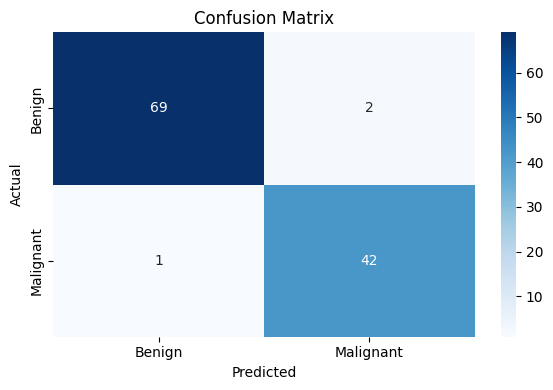

In [51]:

df = pd.read_csv("/content/data (1).csv")


df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
X = pd.DataFrame(X_new, columns=selected_features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

print(f"Accuracy: {acc * 100:.2f}%\n")
print("Classification Report:")
print(cr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

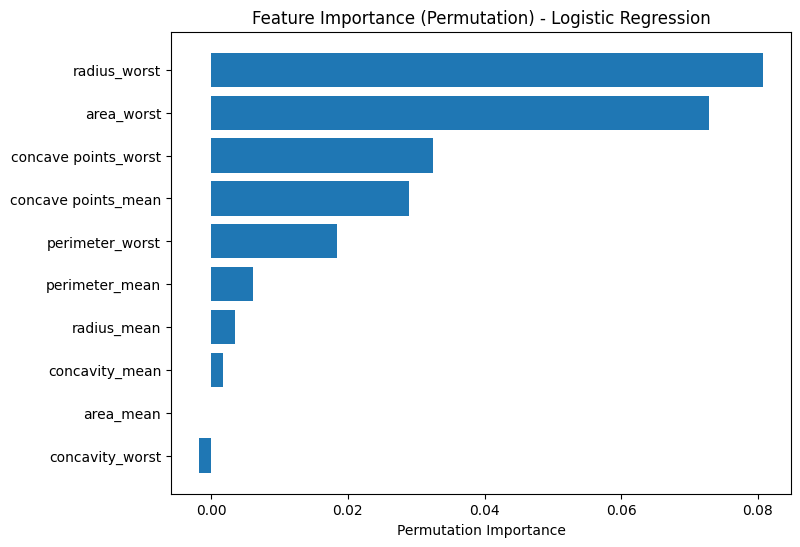

In [52]:
# Permutation Feature Importance
perm_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = perm_result.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(X.columns[perm_sorted_idx], perm_result.importances_mean[perm_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Permutation) - Logistic Regression")
plt.show()

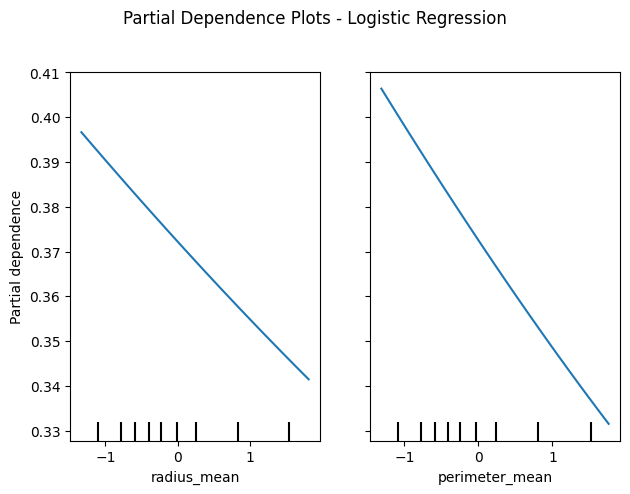

In [53]:
# Partial Dependence Plots
features = [0, 1]
PartialDependenceDisplay.from_estimator(model, X_train, features=features, feature_names=X.columns,  random_state=42)
plt.suptitle("Partial Dependence Plots - Logistic Regression", y=1.02)
plt.tight_layout()
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

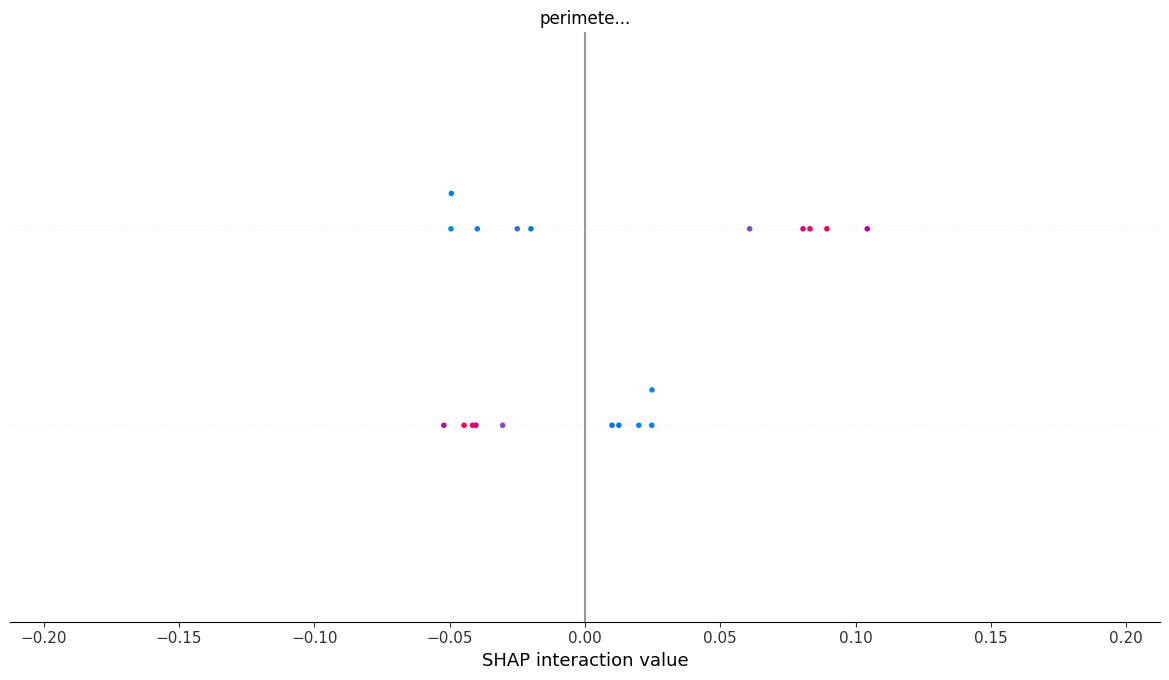

DimensionError: Length of features is not equal to the length of shap_values!

In [55]:

shap.initjs()
explainer_shap = shap.KernelExplainer(model.predict_proba, shap.sample(X_train, 100))
shap_values = explainer_shap.shap_values(X_test[:10])


shap.summary_plot(shap_values, X_test[:10], feature_names=X.columns)

shap.force_plot(explainer_shap.expected_value, shap_values[0][0], feature_names=X.columns)


lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns.tolist(),
    class_names=['Benign', 'Malignant'],
    mode='classification'
)


lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=model.predict_proba
)

lime_exp.show_in_notebook(show_table=True)

In [56]:

from sklearn.datasets import load_iris #
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

accuracy = rf_model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


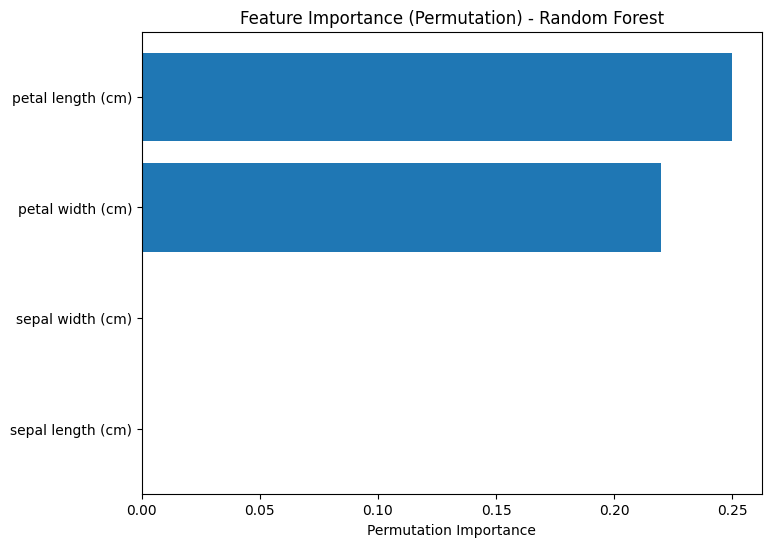

In [57]:
# Permutation Feature Importance
perm_result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = perm_result.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(X.columns[perm_sorted_idx], perm_result.importances_mean[perm_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Permutation) - Random Forest")
plt.show()



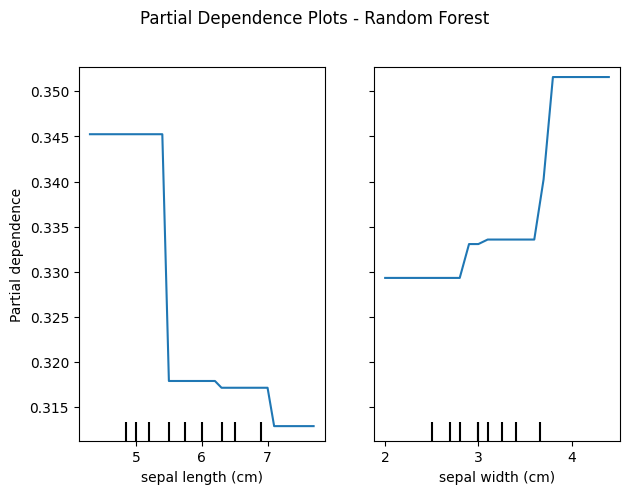

In [58]:

features = [0, 1]

PartialDependenceDisplay.from_estimator(rf_model, X_train, features=features, feature_names=X.columns,  random_state=42, target=0)
plt.suptitle("Partial Dependence Plots - Random Forest", y=1.02)
plt.tight_layout()
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

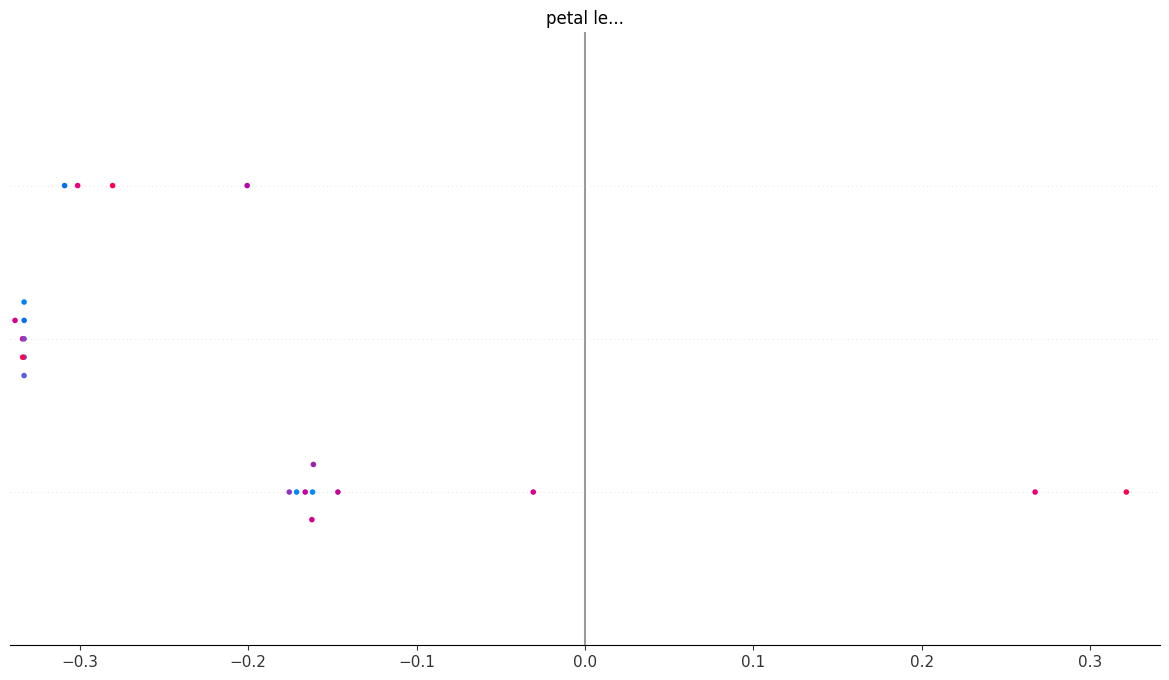

DimensionError: Length of features is not equal to the length of shap_values!

In [59]:

shap.initjs()
explainer_shap = shap.KernelExplainer(rf_model.predict_proba, shap.sample(X_train, 100))
shap_values = explainer_shap.shap_values(X_test[:10])


shap.summary_plot(shap_values, X_test[:10], feature_names=X.columns)


shap.force_plot(explainer_shap.expected_value[0], shap_values[0][0], feature_names=X.columns)


lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=iris.target_names,
    mode='classification'
)


lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[0].values,
    predict_fn=rf_model.predict_proba
)

lime_exp.show_in_notebook(show_table=True)